<a href="https://colab.research.google.com/github/Nihala-RI/C-program/blob/master/Dynamic_Pricing_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/dynamic_pricing.csv')
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [3]:
data.shape

(1000, 10)

In [53]:
data.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


In [6]:
data.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


{'whiskers': [<matplotlib.lines.Line2D at 0x7e91367dbcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e91367fc250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e91367dba30>],
 'medians': [<matplotlib.lines.Line2D at 0x7e91367fc790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e91367fca30>],
 'means': []}

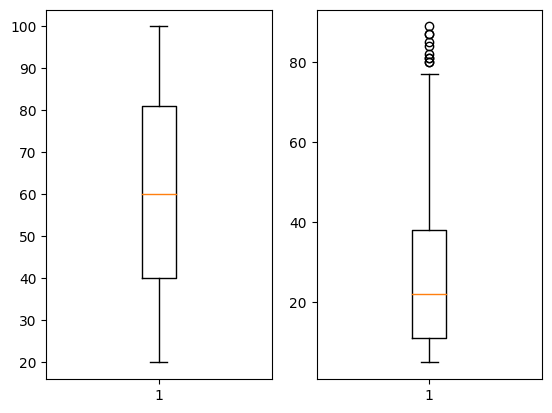

In [7]:
plt.subplot(1,2,1)
plt.boxplot(data['Number_of_Riders'])
plt.subplot(1,2,2)
plt.boxplot(data['Number_of_Drivers'])

In [8]:
x=np.array(data['Expected_Ride_Duration'])
y=np.array(data['Historical_Cost_of_Ride'])

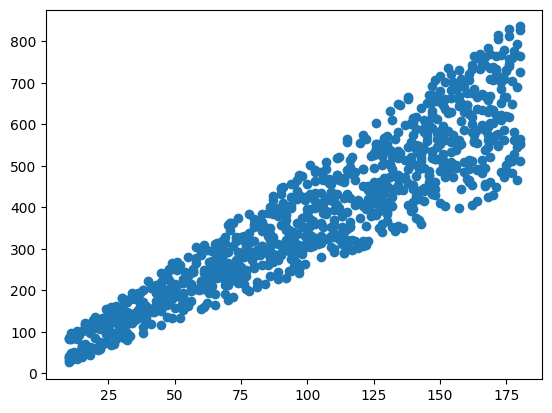

In [9]:
plt.scatter(x,y)

<Axes: xlabel='Vehicle_Type', ylabel='Historical_Cost_of_Ride'>

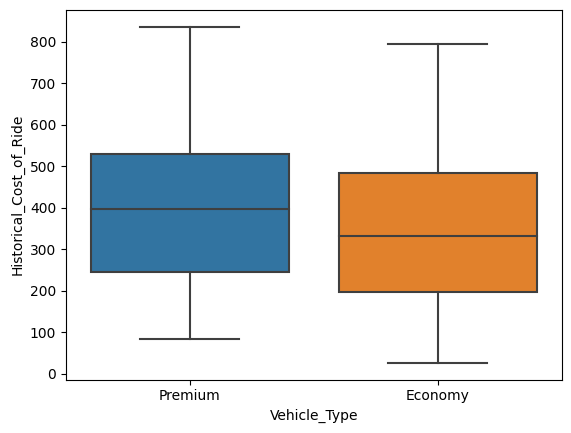

In [10]:
sns.boxplot(x=data['Vehicle_Type'],
            y=data['Historical_Cost_of_Ride'])

In [11]:
corr_matrix=data.corr()

<ipython-input-11-dad23a0c43be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()


<Axes: >

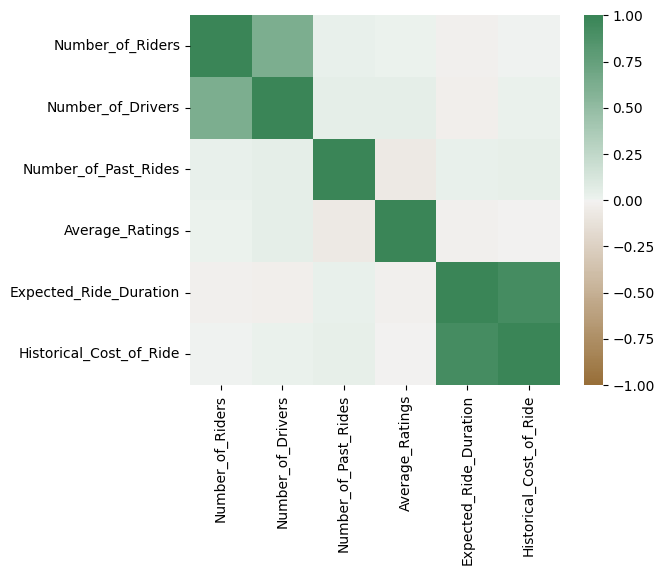

In [12]:
sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(50,500,n=500),
    square=True)

In [3]:
data['Demand_Multiplier']=np.where(data['Number_of_Riders']>np.percentile(data['Number_of_Riders'],75),
                                   data['Number_of_Riders']/np.percentile(data['Number_of_Riders'],75),
                                   data['Number_of_Riders']/np.percentile(data['Number_of_Riders'],25))

In [4]:
data['Supply_multiplier']=np.where(data['Number_of_Drivers']>np.percentile(data['Number_of_Drivers'],25),
                                   np.percentile(data['Number_of_Drivers'],75)/data['Number_of_Drivers'],
                                   np.percentile(data['Number_of_Drivers'],25)/data['Number_of_Drivers'])

In [17]:
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,Demand_Multiplier,Supply_multiplier
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,1.111111,0.844444
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1.450000,0.974359
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,1.050000,1.225806
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,1.098765,1.357143
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,1.950000,1.727273


In [5]:
# Define price adjustment factors for high and low demand/supply
demand_threshold_high = 1.2  # Higher demand threshold
demand_threshold_low = 0.8  # Lower demand threshold
supply_threshold_high = 0.8  # Higher supply threshold
supply_threshold_low = 1.2  # Lower supply threshold

In [6]:
# Calculate adjusted_ride_cost for dynamic pricing
data['Adjusted_Ride_Cost']=data['Historical_Cost_of_Ride']*(
    np.maximum(data['Demand_Multiplier'],demand_threshold_low)*
np.maximum(data['Supply_multiplier'],supply_threshold_high))


In [19]:
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,Demand_Multiplier,Supply_multiplier,Adjusted_Ride_Cost
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,1.111111,0.844444,266.710528
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1.450000,0.974359,245.653817
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,1.050000,1.225806,424.478684
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,1.098765,1.357143,701.155452
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,1.950000,1.727273,1952.472427


In [7]:
data['Profit_Percentage']=((data['Adjusted_Ride_Cost']-data['Historical_Cost_of_Ride'])/data['Historical_Cost_of_Ride'])*100

In [8]:
Profitable_Rides=data[data['Profit_Percentage']>0]
Loss_Rides=data[data['Profit_Percentage']<0]

In [32]:
Profitable_Rides.head()


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,Demand_Multiplier,Supply_multiplier,Adjusted_Ride_Cost,Profit_Percentage
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1.450000,0.974359,245.653817,41.282051
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,1.050000,1.225806,424.478684,28.709677
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,1.098765,1.357143,701.155452,49.118166
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,1.950000,1.727273,1952.472427,236.818182
5,59,35,Urban,Silver,83,3.51,Night,Economy,128,339.955361,1.475000,1.085714,544.414227,60.142857


In [33]:
Loss_Rides.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,Demand_Multiplier,Supply_multiplier,Adjusted_Ride_Cost,Profit_Percentage
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,1.111111,0.844444,266.710528,-6.172840
21,22,11,Suburban,Silver,79,4.48,Night,Economy,15,64.071173,0.550000,1.000000,51.256938,-20.000000
27,97,75,Urban,Silver,76,4.70,Night,Economy,158,652.617297,1.197531,0.506667,625.223485,-4.197531
36,28,11,Suburban,Gold,52,4.33,Afternoon,Premium,94,456.180947,0.700000,1.000000,364.944757,-20.000000
42,97,81,Suburban,Regular,52,4.56,Evening,Economy,125,530.759994,1.197531,0.469136,508.481179,-4.197531


In [51]:
values=[len(Profitable_Rides),len(Loss_Rides)]
labels=['Profitable_Rides','Loss_Rides']

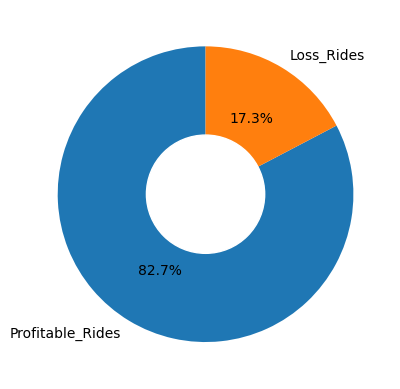

In [61]:
plt.pie(values,labels=labels,startangle=90,autopct='%1.1f%%')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [62]:
x=np.array(data['Expected_Ride_Duration'])
y=np.array(data['Adjusted_Ride_Cost'])

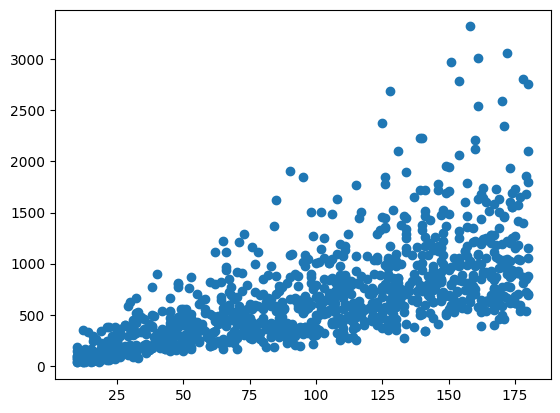

In [63]:
plt.scatter(x,y)

In [12]:
#Identify numeric and categorical features
numeric_features = data.select_dtypes(include=['float', 'int']).columns
categorical_features=data.select_dtypes(include=['object']).columns

In [27]:

def data_preprocessing_pipeline(data):
  #Identify numeric and categorical features
  numeric_features = data.select_dtypes(include=['float', 'int']).columns
  categorical_features=data.select_dtypes(include=['object']).columns

  #Handling Missing Values in Numeric Features
  data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())

  #Detect and handle outliers in numeric features using IQR
  for feature in numeric_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    data[feature]=np.where(data[feature]<lower_bound | data[feature]>upper_bound,
                           data[feature].mean(),data[feature])
  data[categorical_features]=data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

  return data

In [9]:
data['Vehicle_Type'] = data['Vehicle_Type'].map({'Premium':1,"Economy":0})

In [52]:
from sklearn.model_selection import train_test_split
x=data[['Number_of_Riders','Number_of_Drivers','Expected_Ride_Duration','Vehicle_Type']]
y=data['Adjusted_Ride_Cost']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((800, 4), (800,), (200, 4), (200,))

In [55]:
# Training a random forest regression model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [64]:
#Testing the model
y_pred=model.predict(x_test)
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
521,614.288912,510.516219
737,619.571272,813.748211
740,694.281500,911.211019
660,626.100667,741.280944
411,338.825192,227.235347
...,...,...
408,1015.471195,1341.193360
332,407.166031,403.712332
208,862.118043,775.929252
613,729.767726,878.838811


In [65]:
model.score(x_test,y_test)

0.8663425876308692

In [67]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

0.8663425876308692

In [68]:
mean_squared_error(y_test,y_pred)

30617.62853711335

In [56]:
def get_vehicle_type_numeric(vehicle_type):
  vehicle_type_mapping = {
      "Premium":1,
      "Economy":0
  }
  vehicle_type_numeric = vehicle_type_mapping.get(vehicle_type)
  return vehicle_type_numeric

In [59]:
#Predicting user input values
def predict_price(Number_of_Riders,Number_of_Drivers,Expected_Ride_Duration,vehicle_Type):
  vehicle_type_numeric = get_vehicle_type_numeric(vehicle_Type)
  if vehicle_type_numeric is None:
    raise ValueError("Invalid vehicle type")
  input_data = np.array([[Number_of_Riders,Number_of_Drivers,Expected_Ride_Duration,vehicle_type_numeric]])
  predicted_price = model.predict(input_data)
  return predicted_price


In [60]:
# Example prediction using user input values
user_number_of_riders = 50
user_number_of_drivers = 25
Expected_Ride_Duration = 30
user_vehicle_type ="Economy"
predicted_price = predict_price(user_number_of_riders, user_number_of_drivers, Expected_Ride_Duration, user_vehicle_type)
print("Predicted price:", predicted_price)

Predicted price: [270.28968188]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
